In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Pandas

## Конфигурирование

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#pd.describe_option()
pd.get_option('display.max_columns')

40

## Series

### Созданиe

In [4]:
cities = ['Moscow', 'Saint-Petersburg', 'Penza']
area = [123, 100, 15]
cities_area_series = pd.Series(data=area, index=cities, name='cities_area')
cities_area_series

Moscow              123
Saint-Petersburg    100
Penza                15
Name: cities_area, dtype: int64

In [5]:
cars_price = {'geely': 2_000_000, 'haval': 2.5*1E6}
pd.Series(cars_price, name='cars_price')

geely   2000000.00
haval   2500000.00
Name: cars_price, dtype: float64

### Получение данных

In [6]:
print(cities_area_series['Moscow'], cities_area_series.iloc[0])

123 123


In [7]:
cities_area_series[cities_area_series >= 100]

Moscow              123
Saint-Petersburg    100
Name: cities_area, dtype: int64

### Изменение данных

In [8]:
cities_area_series['Moscow'] = 250
print(cities_area_series['Moscow'])

250


In [9]:
cities_area_series.index=['London', 'Paris', 'Amsterdam']
cities_area_series

London       250
Paris        100
Amsterdam     15
Name: cities_area, dtype: int64

In [10]:
def increase_by_two(x):
    return x + 2

cities_area_series = cities_area_series.apply(increase_by_two)
cities_area_series

London       252
Paris        102
Amsterdam     17
Name: cities_area, dtype: int64

## DataFrame

In [11]:
stock_price = pd.DataFrame()
for ticker in ['SPCE', 'KEX', 'AAPL', 'TSLA', 'AMZN']:
    df = pd.read_csv(f"data/{ticker}_stock.csv", parse_dates=['dt'], skiprows=0)
    df['ticker'] = ticker
    if stock_price.empty:
        stock_price = df.copy()
        continue
    stock_price = pd.concat([stock_price, df])
stock_price=stock_price.reset_index(drop=True)

In [12]:
stock_price.head(), stock_price.index

(                   dt  price  change  change_percent      volume ticker
 0 2023-01-03 16:00:00   3.49    0.00            0.00  7668027.00   SPCE
 1 2023-01-04 16:00:00   3.64    0.15            0.04  4858879.00   SPCE
 2 2023-01-05 16:00:00   3.66    0.17            0.05  5262860.00   SPCE
 3 2023-01-06 16:00:00   3.69    0.20            0.06  4090692.00   SPCE
 4 2023-01-09 16:00:00   3.91    0.42            0.12 10357731.00   SPCE,
 RangeIndex(start=0, stop=1165, step=1))

### Создание новых столбцов

In [13]:
# добавление столбца с временем года на основании даты
def season(t_val):
    if t_val.month in (12,1,2):
        return 'winter'
    elif t_val.month in (3,4,5):
        return 'spring'
    elif t_val.month in (6,7,8):
        return "summer"
    else:
        return "autumn"
    

stock_price['season'] = stock_price['dt'].apply(season)
stock_price['season'].value_counts(normalize=True, dropna=False)

season
spring   0.27
summer   0.27
autumn   0.27
winter   0.18
Name: proportion, dtype: float64

In [14]:
# np.select
conditions = [(stock_price['season'] == "spring"), (stock_price['season'] == "summer"), (stock_price['season'] == "autumn"), (stock_price['season'] == "winter")]
values = ['весна', 'лето', 'осень', 'зима']

stock_price['время года'] = np.select(conditions, values)
stock_price['время года'].value_counts(normalize=True, dropna=False)

время года
весна   0.27
лето    0.27
осень   0.27
зима    0.18
Name: proportion, dtype: float64

In [15]:
# введение столбца на основании условия к другому столбцу
median_price = stock_price.price.median()
stock_price['price_more_then_median'] = ['больше медианы' if price_value > median_price \
                                         else 'равно медиане' if price_value == median_price \
                                         else 'меньше медианы' for price_value in stock_price.price] 
stock_price.price_more_then_median.value_counts(normalize=True)

price_more_then_median
меньше медианы   0.50
больше медианы   0.50
равно медиане    0.00
Name: proportion, dtype: float64

In [16]:
# введение столбца на основании условий к значений из нескольких столбцов
stock_price['is_positive_trend'] = ['позитивный тренд' if p > median_price and cp > 0 
                                    else 'неопределенность' if p <= median_price and cp > 0 
                                    else np.nan for p, cp in zip(stock_price['price'], stock_price.change_percent)]
stock_price.is_positive_trend.value_counts(normalize=True, dropna=False)

is_positive_trend
позитивный тренд   0.50
неопределенность   0.40
NaN                0.10
Name: proportion, dtype: float64

In [17]:
# np.where
stock_price['volume_2_cat'] = np.where(stock_price.volume > stock_price.volume.quantile(.9), 'Большой объем', 'Малый объем')
stock_price['volume_2_cat'].value_counts(normalize=True)

volume_2_cat
Малый объем     0.90
Большой объем   0.10
Name: proportion, dtype: float64

In [18]:
# c использование словаря
stock_price['volume_2_cat_bool'] = stock_price['volume_2_cat'].map({'Большой объем': True, 'Малый объем': False})
stock_price['volume_2_cat_bool'].value_counts(normalize=True, dropna=False)

volume_2_cat_bool
False   0.90
True    0.10
Name: proportion, dtype: float64

### Полезные методы и атрибуты

In [19]:
stock_price.head(3)

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False


In [20]:
print(f"{'*'*50}\ndtype - типы данных по столбцам\n{'*'*50}\n\
{stock_price.dtypes}\n\
{'*'*50}\nshape - форма\n{'*'*50}\n\
{stock_price.shape}\n\
{'*'*50}\nsize - количество элементов\n{'*'*50}\n\
{stock_price.size}\n\
{'*'*50}\nindex - индекс\n{'*'*50}\n\
{stock_price.index}\n\
{'*'*50}\nunique - уникальные значения\n{'*'*50}\n\
{stock_price.change.unique()}\n\
{'*'*50}\nunique - количество уникальных значений\n{'*'*50}\n\
{stock_price.change.nunique()}\n\
{'*'*50}\nvalue_counts - сколько каких значений\n{'*'*50}\n\
{stock_price.price.value_counts(normalize=True)}\n\
")

**************************************************
dtype - типы данных по столбцам
**************************************************
dt                        datetime64[ns]
price                            float64
change                           float64
change_percent                   float64
volume                           float64
ticker                            object
season                            object
время года                        object
price_more_then_median            object
is_positive_trend                 object
volume_2_cat                      object
volume_2_cat_bool                   bool
dtype: object
**************************************************
shape - форма
**************************************************
(1165, 12)
**************************************************
size - количество элементов
**************************************************
13980
**************************************************
index - индекс
*******************************

### Описательные статистики

In [21]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      1165 non-null   datetime64[ns]
 1   price                   1165 non-null   float64       
 2   change                  1165 non-null   float64       
 3   change_percent          1165 non-null   float64       
 4   volume                  1160 non-null   float64       
 5   ticker                  1165 non-null   object        
 6   season                  1165 non-null   object        
 7   время года              1165 non-null   object        
 8   price_more_then_median  1165 non-null   object        
 9   is_positive_trend       1049 non-null   object        
 10  volume_2_cat            1165 non-null   object        
 11  volume_2_cat_bool       1165 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(4), objec

In [22]:
# описательные статистики для числовых данных
stock_price.describe(exclude=['datetime'])

,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool
count,1165.00,1165.00,1165.00,1160.00,1165,1165,1165,1165,1049,1165,1165
unique,NaN,NaN,NaN,NaN,5,4,4,3,2,2,2
top,NaN,NaN,NaN,NaN,SPCE,spring,весна,меньше медианы,позитивный тренд,Малый объем,False
freq,NaN,NaN,NaN,NaN,233,320,320,582,580,1049,1049
mean,116.75,39.59,0.39,54677280.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,77.02,43.42,0.43,52988840.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.38,-2.72,-0.60,68536.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,70.99,5.77,0.15,7752859.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,123.56,21.63,0.32,47989936.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,176.57,56.40,0.55,77416972.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Изменение типа данных

In [23]:
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('object')
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('str')
print(stock_price['change'].dtype)
stock_price.change = stock_price.change.astype('float')
print(stock_price['change'].dtype)

float64
object
object
float64


### Пропуски

In [24]:
stock_price.iloc[21, 1:3] = np.nan

In [25]:
stock_price.isna().any()

dt                        False
price                      True
change                     True
change_percent            False
volume                     True
ticker                    False
season                    False
время года                False
price_more_then_median    False
is_positive_trend          True
volume_2_cat              False
volume_2_cat_bool         False
dtype: bool

In [26]:
stock_price.isna().sum()

dt                          0
price                       1
change                      1
change_percent              0
volume                      5
ticker                      0
season                      0
время года                  0
price_more_then_median      0
is_positive_trend         116
volume_2_cat                0
volume_2_cat_bool           0
dtype: int64

In [27]:
stock_price[stock_price.isna().values.any(axis=1)]

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False
21,2023-02-02 16:00:00,NaN,NaN,0.82,20903003.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False
63,2023-04-04 16:00:00,3.43,-0.06,-0.02,20661229.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
64,2023-04-05 16:00:00,3.19,-0.30,-0.09,11393519.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
65,2023-04-06 16:00:00,3.15,-0.34,-0.10,13672138.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
...,...,...,...,...,...,...,...,...,...,...,...,...
931,2023-12-05 12:10:00,242.85,134.75,1.25,NaN,TSLA,winter,зима,больше медианы,позитивный тренд,Малый объем,False
932,2023-01-03 16:00:00,85.82,0.00,0.00,76706040.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False
933,2023-01-04 16:00:00,85.14,-0.68,-0.01,68885123.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False
934,2023-01-05 16:00:00,83.12,-2.70,-0.03,67930825.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False


In [28]:
stock_price.price.fillna(0, inplace=True)

In [29]:
stock_price[stock_price.isna().values.any(axis=1)]

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False
21,2023-02-02 16:00:00,0.00,NaN,0.82,20903003.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False
63,2023-04-04 16:00:00,3.43,-0.06,-0.02,20661229.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
64,2023-04-05 16:00:00,3.19,-0.30,-0.09,11393519.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
65,2023-04-06 16:00:00,3.15,-0.34,-0.10,13672138.00,SPCE,spring,весна,меньше медианы,NaN,Малый объем,False
...,...,...,...,...,...,...,...,...,...,...,...,...
931,2023-12-05 12:10:00,242.85,134.75,1.25,NaN,TSLA,winter,зима,больше медианы,позитивный тренд,Малый объем,False
932,2023-01-03 16:00:00,85.82,0.00,0.00,76706040.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False
933,2023-01-04 16:00:00,85.14,-0.68,-0.01,68885123.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False
934,2023-01-05 16:00:00,83.12,-2.70,-0.03,67930825.00,AMZN,winter,зима,меньше медианы,NaN,Малый объем,False


In [30]:
stock_price.change.interpolate('linear', inplace=True)

In [98]:
stock_price.dropna(axis=0).shape

(1045, 16)

In [100]:
stock_price['is_positive_trend'].isna()

0        True
1       False
2       False
3       False
4       False
        ...  
1160    False
1161    False
1162    False
1163    False
1164    False
Name: is_positive_trend, Length: 1165, dtype: bool

In [103]:
stock_price['is_positive_trend'].isnull().any()

True

### Изменение порядка следования столбцов

In [32]:
print(stock_price.columns)
new_stock = stock_price[['dt','change_percent', 'change']].copy(deep=True)
new_stock.head()

Index(['dt', 'price', 'change', 'change_percent', 'volume', 'ticker', 'season',
       'время года', 'price_more_then_median', 'is_positive_trend',
       'volume_2_cat', 'volume_2_cat_bool'],
      dtype='object')


,dt,change_percent,change
0,2023-01-03 16:00:00,0.00,0.00
1,2023-01-04 16:00:00,0.04,0.15
2,2023-01-05 16:00:00,0.05,0.17
3,2023-01-06 16:00:00,0.06,0.20
4,2023-01-09 16:00:00,0.12,0.42


### Создание

In [109]:
people_info = [dict(age=25, height=180, weight=78), dict(age=35, height=190, weight=95)]
pd.DataFrame(people_info)

,age,height,weight
0,25,180,78
1,35,190,95


In [110]:
people_info = dict(Bob=dict(age=25, height=180, weight=78), Ann=dict(age=45, height=150, weight=99))
pd.DataFrame(people_info)

,Bob,Ann
age,25,45
height,180,150
weight,78,99


In [111]:
people_names = ['Bob', 'Ann', 'Max']
people_description = [dict(age=25, height=180, weight=78), 
                      dict(age=35, height=190, weight=95),
                      dict(age=7, height=120, weight=40)]

people = pd.DataFrame(data=people_description, index=people_names)

### Индексация

In [112]:
people

,age,height,weight
Bob,25,180,78
Ann,35,190,95
Max,7,120,40


In [37]:
people.iloc[0:2]

,age,height,weight
Bob,25,180,78
Ann,35,190,95


In [38]:
people.loc['Bob':'Max']

,age,height,weight
Bob,25,180,78
Ann,35,190,95
Max,7,120,40


In [39]:
people.loc['Bob':'Ann', 'height':'weight']

,height,weight
Bob,180,78
Ann,190,95


In [40]:
stock_price.head(1)

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False


In [41]:
stock_price.iloc[2:5, 1:3]

,price,change
2,3.66,0.17
3,3.69,0.20
4,3.91,0.42


In [89]:
stock_price.loc[[2 ,3], ['change', 'price']]

,change,price
2,0.17,3.66
3,0.20,3.69


In [91]:
stock_price.loc[2:10]

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,date,time,month,week
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-05,16:00:00,1,1
3,2023-01-06 16:00:00,3.69,0.20,0.06,4090692.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-06,16:00:00,1,1
4,2023-01-09 16:00:00,3.91,0.42,0.12,10357731.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-09,16:00:00,1,2
5,2023-01-10 16:00:00,4.03,0.54,0.15,7897886.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-10,16:00:00,1,2
6,2023-01-11 16:00:00,4.29,0.80,0.23,8752365.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-11,16:00:00,1,2
7,2023-01-12 16:00:00,4.62,1.13,0.32,15111957.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-12,16:00:00,1,2
8,2023-01-13 16:00:00,5.19,1.70,0.49,46228829.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-13,16:00:00,1,2
9,2023-01-17 16:00:00,5.59,2.10,0.60,20166082.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-17,16:00:00,1,3
10,2023-01-18 16:00:00,4.91,1.42,0.41,18005284.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-18,16:00:00,1,3


In [87]:
stock_price.at[2, 'price'] # берет только 1 значение, работает быстрее

3.66

In [88]:
stock_price.iat[2, 2]

0.17

### Фильтрация

In [43]:
people.loc[people['height'] > 130]

,age,height,weight
Bob,25,180,78
Ann,35,190,95


In [92]:
height_and_weight_verification = (people.height > 130) & (people.weight > 80)
people.loc[height_and_weight_verification]

,age,height,weight
Ann,35,190,150


In [97]:
stock_price[stock_price['season'].isin(['summer', 'winter'])].head()

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,date,time,month,week
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False,2023-01-03,16:00:00,1,1
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-04,16:00:00,1,1
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-05,16:00:00,1,1
3,2023-01-06 16:00:00,3.69,0.20,0.06,4090692.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-06,16:00:00,1,1
4,2023-01-09 16:00:00,3.91,0.42,0.12,10357731.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-09,16:00:00,1,2


In [96]:
stock_price[~stock_price['season'].isin(['summer', 'winter'])].head()

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,date,time,month,week
39,2023-03-01 16:00:00,4.73,1.24,0.36,18461814.00,SPCE,spring,весна,меньше медианы,неопределенность,Малый объем,False,2023-03-01,16:00:00,3,9
40,2023-03-02 16:00:00,5.14,1.65,0.47,11817593.00,SPCE,spring,весна,меньше медианы,неопределенность,Малый объем,False,2023-03-02,16:00:00,3,9
41,2023-03-03 16:00:00,5.50,2.01,0.58,11241951.00,SPCE,spring,весна,меньше медианы,неопределенность,Малый объем,False,2023-03-03,16:00:00,3,9
42,2023-03-06 16:00:00,5.41,1.92,0.55,7699815.00,SPCE,spring,весна,меньше медианы,неопределенность,Малый объем,False,2023-03-06,16:00:00,3,10
43,2023-03-07 16:00:00,5.31,1.82,0.52,6220768.00,SPCE,spring,весна,меньше медианы,неопределенность,Малый объем,False,2023-03-07,16:00:00,3,10


### Изменение даннных

In [45]:
people.loc[height_and_weight_verification, 'weight'] = 150
people

,age,height,weight
Bob,25,180,78
Ann,35,190,150
Max,7,120,40


In [46]:
def add_two(x):
    return x + 2

def difference_between_avg(row):
    row.age -= avg_age
    row.height -= avg_height
    row.weight -= avg_weight
    return row

people['age'].apply(lambda x: x+2)
people['weight'].map(add_two)
avg_age = people.age.mean()
avg_height = people.height.mean()
avg_weight = people.weight.mean()

people_dif = pd.DataFrame(columns=['dif_age', 'dif_height', 'dif_weight'])

In [47]:
people_dif[['dif_age', 'dif_height', 'dif_weight']] = people.apply(difference_between_avg, axis='columns')

In [48]:
people_dif

,dif_age,dif_height,dif_weight
Bob,2.67,16.67,-11.33
Ann,12.67,26.67,60.67
Max,-15.33,-43.33,-49.33


In [49]:
people_dif.applymap(lambda x: x + 100)

,dif_age,dif_height,dif_weight
Bob,102.67,116.67,88.67
Ann,112.67,126.67,160.67
Max,84.67,56.67,50.67


In [113]:
people

,age,height,weight
Bob,25,180,78
Ann,35,190,95
Max,7,120,40


### MAP

In [115]:
d = {35: 45, 7: 8, 25: 'sdf'}
people.age.map(d)


Bob    sdf
Ann     45
Max      8
Name: age, dtype: object

### Работа со временем

In [51]:
stock_price['dt'] = pd.to_datetime(stock_price.dt)
stock_price.dtypes

dt                        datetime64[ns]
price                            float64
change                           float64
change_percent                   float64
volume                           float64
ticker                            object
season                            object
время года                        object
price_more_then_median            object
is_positive_trend                 object
volume_2_cat                      object
volume_2_cat_bool                   bool
dtype: object

In [52]:
stock_price['dt'].dt.day_of_week
stock_price['dt'].dt.day
stock_price['dt'].dt.year
stock_price['dt'].dt.month
stock_price['dt'].dt.day_of_year
stock_price['dt'].dt.day_of_week
stock_price['dt'].dt.days_in_month
stock_price['dt'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4          Monday
          ...    
1160    Wednesday
1161     Thursday
1162       Friday
1163       Monday
1164      Tuesday
Name: dt, Length: 1165, dtype: object

In [53]:
stock_price['dt'].dt.strftime("%d.%m.%Y %M:%H:%S")

0       03.01.2023 00:16:00
1       04.01.2023 00:16:00
2       05.01.2023 00:16:00
3       06.01.2023 00:16:00
4       09.01.2023 00:16:00
               ...         
1160    29.11.2023 00:16:00
1161    30.11.2023 00:16:00
1162    01.12.2023 00:16:00
1163    04.12.2023 00:16:00
1164    05.12.2023 08:12:00
Name: dt, Length: 1165, dtype: object

In [54]:
stock_price['date'] = stock_price['dt'].dt.date

In [55]:
stock_price['time'] = stock_price.dt.dt.time

In [56]:
stock_price['month'] = stock_price.dt.dt.month

In [57]:
stock_price['week'] = stock_price.dt.dt.isocalendar().week

In [58]:
stock_price.head(10)

,dt,price,change,change_percent,volume,ticker,season,время года,price_more_then_median,is_positive_trend,volume_2_cat,volume_2_cat_bool,date,time,month,week
0,2023-01-03 16:00:00,3.49,0.00,0.00,7668027.00,SPCE,winter,зима,меньше медианы,NaN,Малый объем,False,2023-01-03,16:00:00,1,1
1,2023-01-04 16:00:00,3.64,0.15,0.04,4858879.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-04,16:00:00,1,1
2,2023-01-05 16:00:00,3.66,0.17,0.05,5262860.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-05,16:00:00,1,1
3,2023-01-06 16:00:00,3.69,0.20,0.06,4090692.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-06,16:00:00,1,1
4,2023-01-09 16:00:00,3.91,0.42,0.12,10357731.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-09,16:00:00,1,2
5,2023-01-10 16:00:00,4.03,0.54,0.15,7897886.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-10,16:00:00,1,2
6,2023-01-11 16:00:00,4.29,0.80,0.23,8752365.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-11,16:00:00,1,2
7,2023-01-12 16:00:00,4.62,1.13,0.32,15111957.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-12,16:00:00,1,2
8,2023-01-13 16:00:00,5.19,1.70,0.49,46228829.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-13,16:00:00,1,2
9,2023-01-17 16:00:00,5.59,2.10,0.60,20166082.00,SPCE,winter,зима,меньше медианы,неопределенность,Малый объем,False,2023-01-17,16:00:00,1,3


### Группировка

In [59]:
people.groupby('age').mean()

,height,weight
age,,
7,120.00,40.00
25,180.00,78.00
35,190.00,150.00


In [60]:
people.groupby('age')['height'].agg(['min', 'max'])

,min,max
age,,
7,120,120
25,180,180
35,190,190


In [61]:
people.groupby('age').agg({'height': 'max', 'weight': 'min'})

,height,weight
age,,
7,120,40
25,180,78
35,190,150


In [62]:
def square_calc(x):
    return x**2

people.groupby('age').agg(square_calc)

,height,weight
age,,
7,14400,1600
25,32400,6084
35,36100,22500


In [63]:
stock_price.groupby('month')['price'].agg(['sum', 'count'])

,sum,count
month,,
1,8658.59,100
2,10036.19,95
3,11832.95,115
4,9838.03,95
5,11798.29,110
6,13352.42,105
7,13550.90,100
8,14797.93,115
9,13110.15,100


In [64]:
mult_ind_df = stock_price.groupby(['month', 'week'])[['price', 'volume_2_cat']].agg(
    {
        'price': ['sum', 'mean'],
        'volume_2_cat': ['count', lambda x: x]
    }
)
mult_ind_df.head()

price       volume_2_cat  \
               sum  mean        count   
month week                              
1     1    1558.17 77.91           20   
      2    2075.06 83.00           25   
      3    1717.51 85.88           20   
      4    2330.43 93.22           25   
      5     977.42 97.74           10   

                                                               
                                                   <lambda_0>  
month week                                                     
1     1     [Малый объем, Малый объем, Малый объем, Малый ...  
      2     [Малый объем, Малый объем, Малый объем, Малый ...  
      3     [Малый объем, Малый объем, Малый объем, Малый ...  
      4     [Малый объем, Малый объем, Малый объем, Малый ...  
      5     [Малый объем, Малый объем, Малый объем, Малый ...

In [65]:
stock_price.groupby(['month', 'week'])[['volume', 'price']].apply(lambda row: sum(row['volume'] * row['price'])).head(10)

month  week
1      1      160152645537.10
       2      191222036634.42
       3      154951246505.50
       4      259642716835.95
       5      105365078823.08
2      5      218459116267.46
       6      284636967676.42
       7      285038118223.99
       8      184642597145.63
       9       87795343449.65
dtype: float64

In [66]:
import numpy as np
stock_price.groupby(['ticker', 'month'])[['volume', 'price']].agg(
    {
        'volume': [np.mean, np.median],
        'price': [np.max, np.min]        
    }
).head()

volume              price       
                    mean      median    max    min
ticker month                                      
AAPL   1     72182636.25 69565874.50 145.93 125.02
       2     68804973.32 61707573.00 155.33 145.43
       3     66107013.70 68572400.00 164.90 145.31
       4     51040861.47 49386480.00 169.68 160.10
       5     57971114.68 54279738.00 177.30 165.79

### Мультииндекс

In [67]:
mult_ind_df = stock_price.groupby(['month', 'week'])[['price', 'volume_2_cat']].agg(
    {
        'price': ['sum', 'mean'],
        'volume_2_cat': ['count', lambda x: x]
    }
)
mult_ind_df.head()

price       volume_2_cat  \
               sum  mean        count   
month week                              
1     1    1558.17 77.91           20   
      2    2075.06 83.00           25   
      3    1717.51 85.88           20   
      4    2330.43 93.22           25   
      5     977.42 97.74           10   

                                                               
                                                   <lambda_0>  
month week                                                     
1     1     [Малый объем, Малый объем, Малый объем, Малый ...  
      2     [Малый объем, Малый объем, Малый объем, Малый ...  
      3     [Малый объем, Малый объем, Малый объем, Малый ...  
      4     [Малый объем, Малый объем, Малый объем, Малый ...  
      5     [Малый объем, Малый объем, Малый объем, Малый ...

In [68]:
mult_ind_df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in mult_ind_df.columns]

In [69]:
mult_ind_df.head()

price_sum  price_mean  volume_2_cat_count  \
month week                                              
1     1       1558.17       77.91                  20   
      2       2075.06       83.00                  25   
      3       1717.51       85.88                  20   
      4       2330.43       93.22                  25   
      5        977.42       97.74                  10   

                                      volume_2_cat_<lambda_0>  
month week                                                     
1     1     [Малый объем, Малый объем, Малый объем, Малый ...  
      2     [Малый объем, Малый объем, Малый объем, Малый ...  
      3     [Малый объем, Малый объем, Малый объем, Малый ...  
      4     [Малый объем, Малый объем, Малый объем, Малый ...  
      5     [Малый объем, Малый объем, Малый объем, Малый ...

In [70]:
df=stock_price.pivot_table(values='price', index=['season', 'ticker'], columns=['month'], aggfunc=sum)
df=df.reset_index()
df.head()

month,season,ticker,1,2,3,4,5,6,7,8,9,10,11,12
0,autumn,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3540.05,3842.71,3903.47,NaN
1,autumn,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2708.80,2822.13,3012.61,NaN
2,autumn,KEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1681.85,1769.31,1612.06,NaN
3,autumn,SPCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.09,35.37,41.25,NaN
4,autumn,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5139.36,5211.97,4817.65,NaN


In [71]:
df.index, df.columns
# df.columns = ['season', 'ticker', ('min', 'price'), ('max', 'price')]
# df

(RangeIndex(start=0, stop=20, step=1),
 Index(['season', 'ticker', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object', name='month'))

In [72]:
df.melt(id_vars=['season', 'ticker'], value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

,season,ticker,month,value
0,autumn,AAPL,1,NaN
1,autumn,AMZN,1,NaN
2,autumn,KEX,1,NaN
3,autumn,SPCE,1,NaN
4,autumn,TSLA,1,NaN
...,...,...,...,...
235,winter,AAPL,12,573.92
236,winter,AMZN,12,438.18
237,winter,KEX,12,231.89
238,winter,SPCE,12,6.17


### Корреляции

<Axes: >

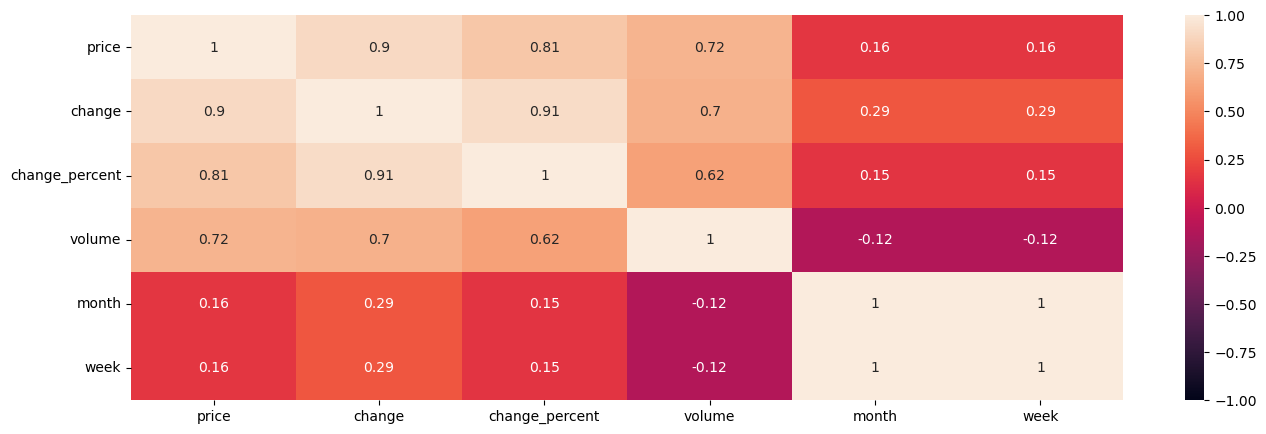

In [73]:
plt.rcParams['figure.figsize'] = (16, 5)
# plt.figure(figsize=(16,5))
number_columns = stock_price.select_dtypes('number').columns
sns.heatmap(stock_price[number_columns].corr(), vmax=1, vmin=-1, annot=True)

### Сводные таблицы

In [74]:
df = stock_price.groupby(['ticker', 'season'])[['volume', 'price']].agg(np.mean).reset_index()
df

,ticker,season,volume,price
0,AAPL,autumn,57309211.08,179.15
1,AAPL,spring,58837534.47,164.03
2,AAPL,summer,56532021.19,185.67
3,AAPL,winter,69269306.34,146.62
4,AMZN,autumn,53514789.84,135.61
5,AMZN,spring,62605323.91,103.86
6,AMZN,summer,54932284.69,131.05
7,AMZN,winter,72591287.05,100.18
8,KEX,autumn,368054.03,80.37
9,KEX,spring,325777.44,70.31


In [75]:
df.pivot_table(values=['price', 'volume'], index=['season'], columns=['ticker'])

price                               volume                        \
ticker   AAPL   AMZN   KEX SPCE   TSLA        AAPL        AMZN       KEX   
season                                                                     
autumn 179.15 135.61 80.37 1.85 240.78 57309211.08 53514789.84 368054.03   
spring 164.03 103.86 70.31 4.05 180.71 58837534.47 62605323.91 325777.44   
summer 185.67 131.05 77.81 3.75 253.31 56532021.19 54932284.69 314845.59   
winter 146.62 100.18 68.96 4.84 171.35 69269306.34 72591287.05 405064.46   

                                 
ticker        SPCE         TSLA  
season                           
autumn 11675016.75 121966479.68  
spring  9875209.23 132817778.66  
summer 23969870.02 130322194.95  
winter 11347790.93 188997033.59

In [76]:
df = stock_price.pivot_table(values=['price', 'volume'], index='season', columns=['ticker'], aggfunc=[np.min, np.max])
# df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df.columns]
# df = df.reset_index()
df

min                                                             \
        price                               volume                         
ticker   AAPL   AMZN   KEX SPCE   TSLA        AAPL        AMZN       KEX   
season                                                                     
autumn 166.89 119.57 73.89 1.38 197.36 24048344.00 22378379.00  68536.00   
spring 145.31  90.73 65.05 3.15 153.75 37266659.00 37261185.00 171217.00   
summer 174.00 121.23 72.83 2.52 207.52 31458198.00 28264785.00 161258.00   
winter 125.02  83.12 60.64 0.00 108.10 43389519.00 39951833.00 207779.00   

                                  max                                        \
                                price                                volume   
ticker       SPCE         TSLA   AAPL   AMZN   KEX SPCE   TSLA         AAPL   
season                                                                        
autumn 5354904.00  65125203.00 191.45 147.73 86.19 2.58 276.04 112488803.00   
spring 3952252.00  88965043.00 177.30 121.66 75.64 5.50 207.46 113453171.00   
summer 5275703.00  83645720.00 196.45 142.22 82.88 6.01 293.34 121946497.00   
winter 4090692.00 104099817.00 193.25 147.03 78.67 6.37 242.85 154357337.00   

                                                          
                                                          
ticker         AMZN        KEX         SPCE         TSLA  
season                                                    
autumn 125309313.00  909166.00  47524431.00 174667852.00  
spring 149961167.00  846109.00  29143687.00 210970819.00  
summer 153128470.00  761921.00 152662990.00 211797109.00  
winter 158154243.00 1153300.00  46228829.00 306590613.00

### Визуализации

<Axes: >

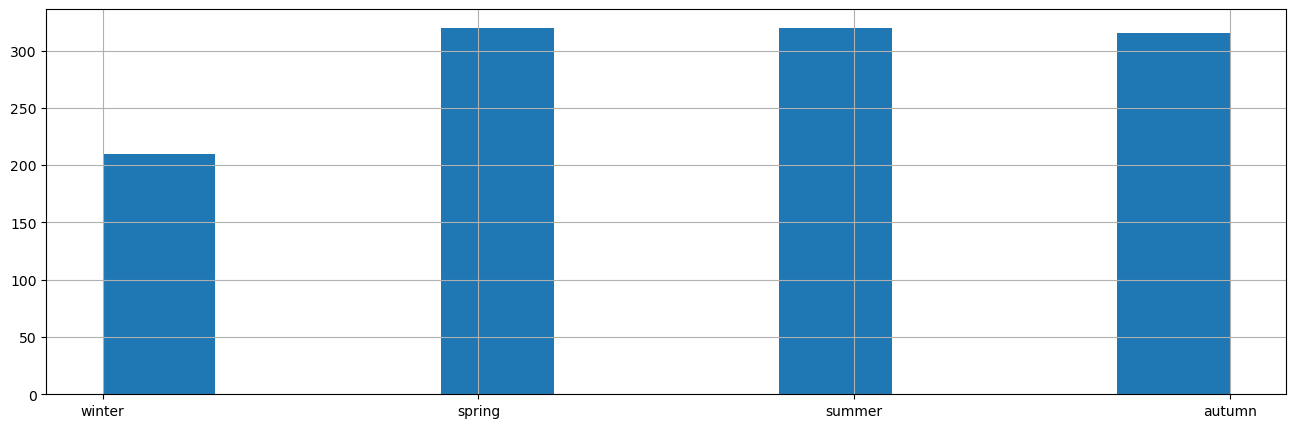

In [77]:
stock_price.season.hist()

<Axes: >

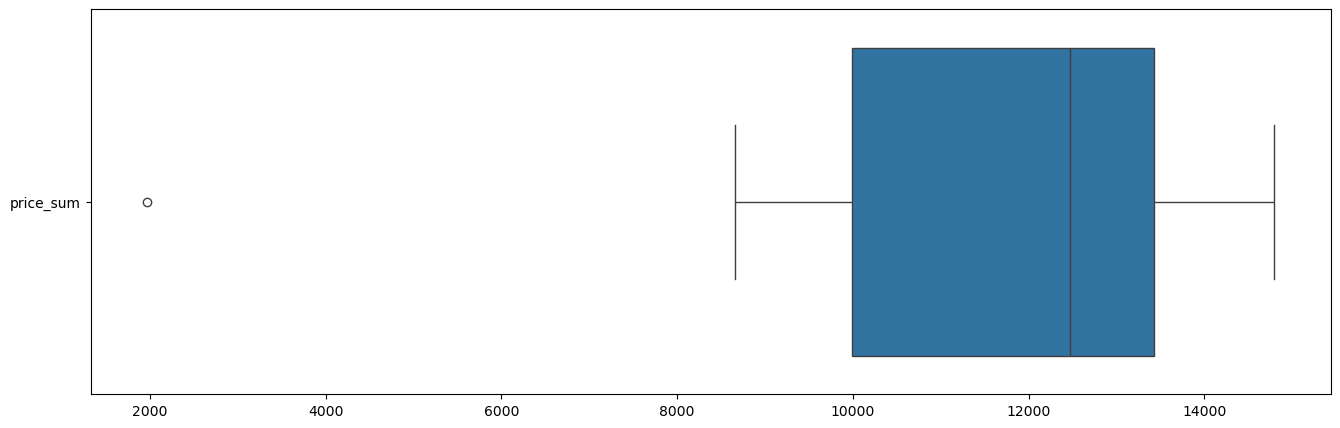

In [78]:
month_price_sum = stock_price.groupby('month').price.agg(price_sum='sum')
sns.boxplot(month_price_sum, orient='h')

<Axes: xlabel='month_', ylabel='volume_mean'>

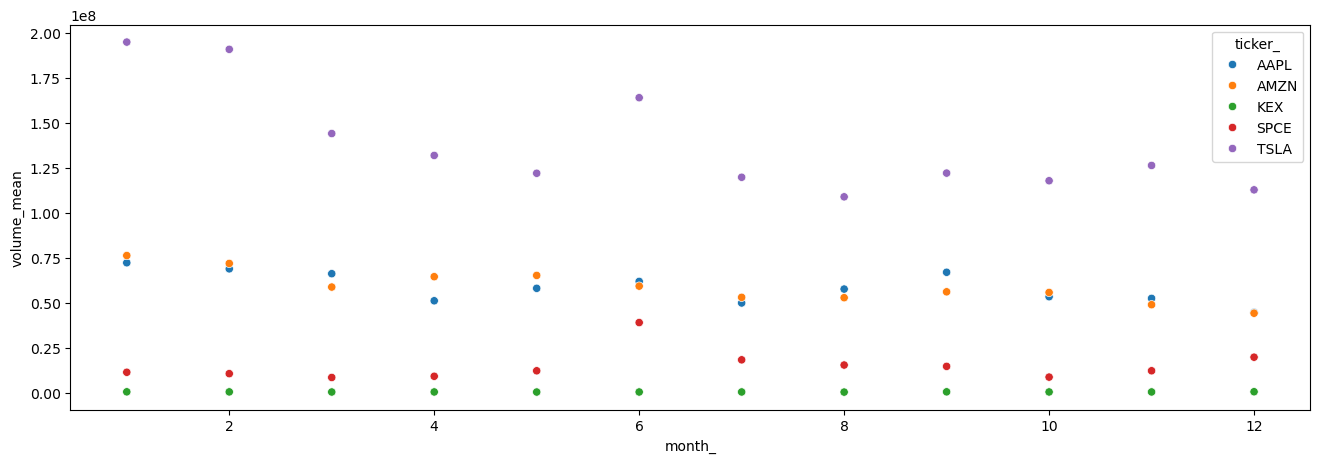

In [79]:
df = stock_price.groupby(['ticker', 'month'])[['volume', 'price']].agg(
    {
        'volume': [np.mean, np.median],
        'price': [np.max, np.min]        
    }
)
df = df.reset_index()

df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df.columns]
df.head()

sns.scatterplot(x=df['month_'], y=df['volume_mean'], hue=df.ticker_)

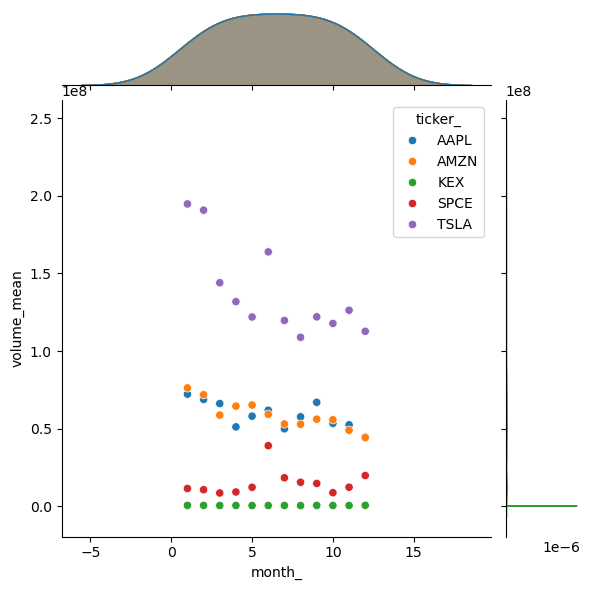

In [80]:
sns.jointplot(data=df, x='month_', y='volume_mean', hue=df.ticker_)

<Axes: xlabel='month_', ylabel='price_max'>

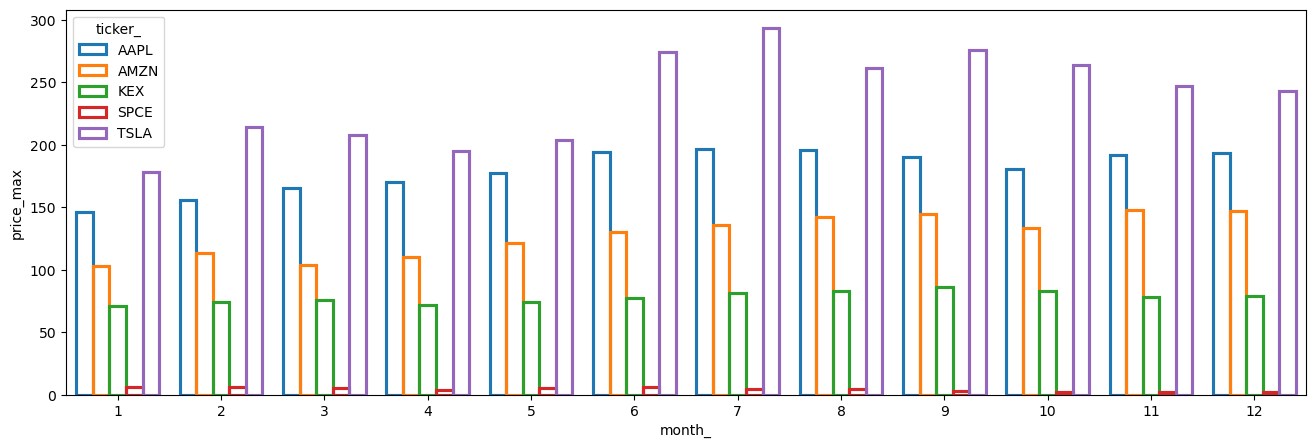

In [81]:
sns.barplot(data=df, x='month_', y='price_max', hue=df.ticker_, fill=False)

### Интересные методы

In [82]:
stock_price.volume.astype('str').replace('\\.0', '!!', regex=True)

0        7668027!!
1        4858879!!
2        5262860!!
3        4090692!!
4       10357731!!
           ...    
1160    40610907!!
1161    65814022!!
1162    39951833!!
1163    48294244!!
1164           nan
Name: volume, Length: 1165, dtype: object